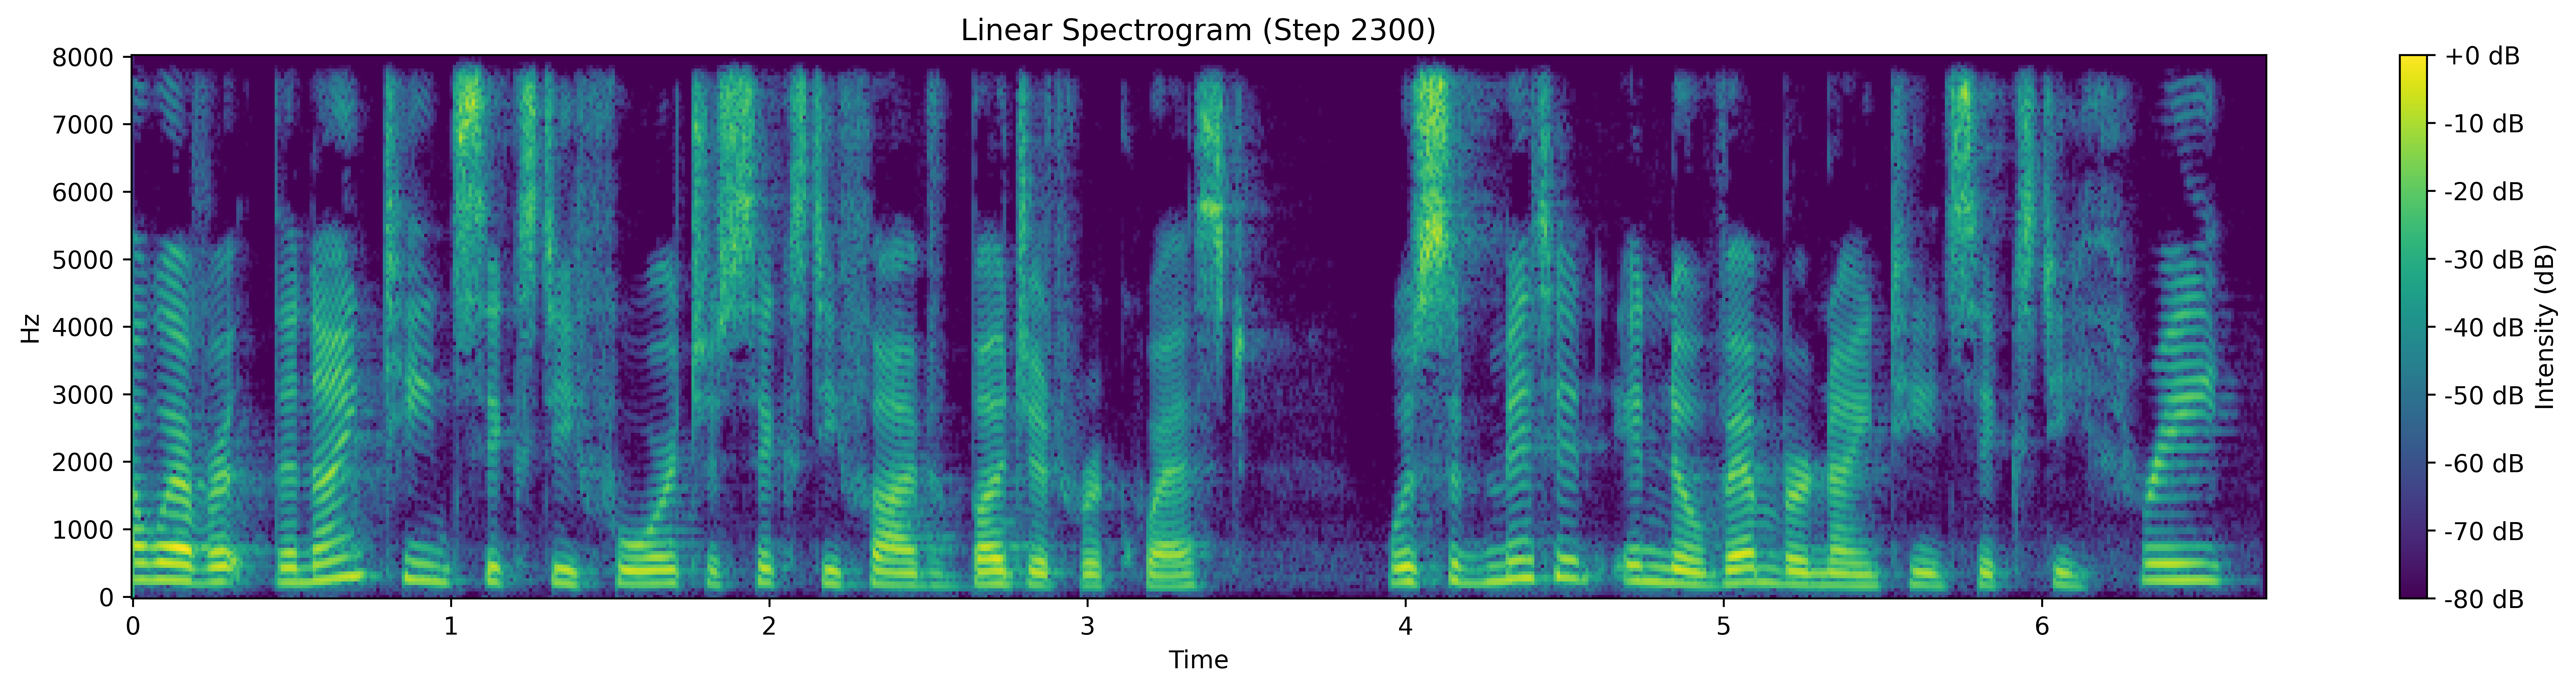

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# === Parameters ===
step = 2300
file_path = f"temp/{step}.wav"
start_trim_sec = 7.8

n_fft = 320
hop_length = n_fft // 2  # 75% overlap

# === Load waveform ===
y, sr = librosa.load(file_path, sr=None, mono=True)
y = y[int(start_trim_sec * sr):]
y = y / np.max(np.abs(y))  # Normalize

# === Compute linear spectrogram ===
S = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length)) ** 2
S_db = librosa.power_to_db(S, ref=np.max)

# === Plot ===
plt.figure(dpi=600, figsize=(16, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='linear', cmap=None)
plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')
plt.title(f'Linear Spectrogram (Step {step})')
plt.tight_layout()

/raid/home/rajivratn/anaconda3/envs/langspeech/lib/python3.9/site-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


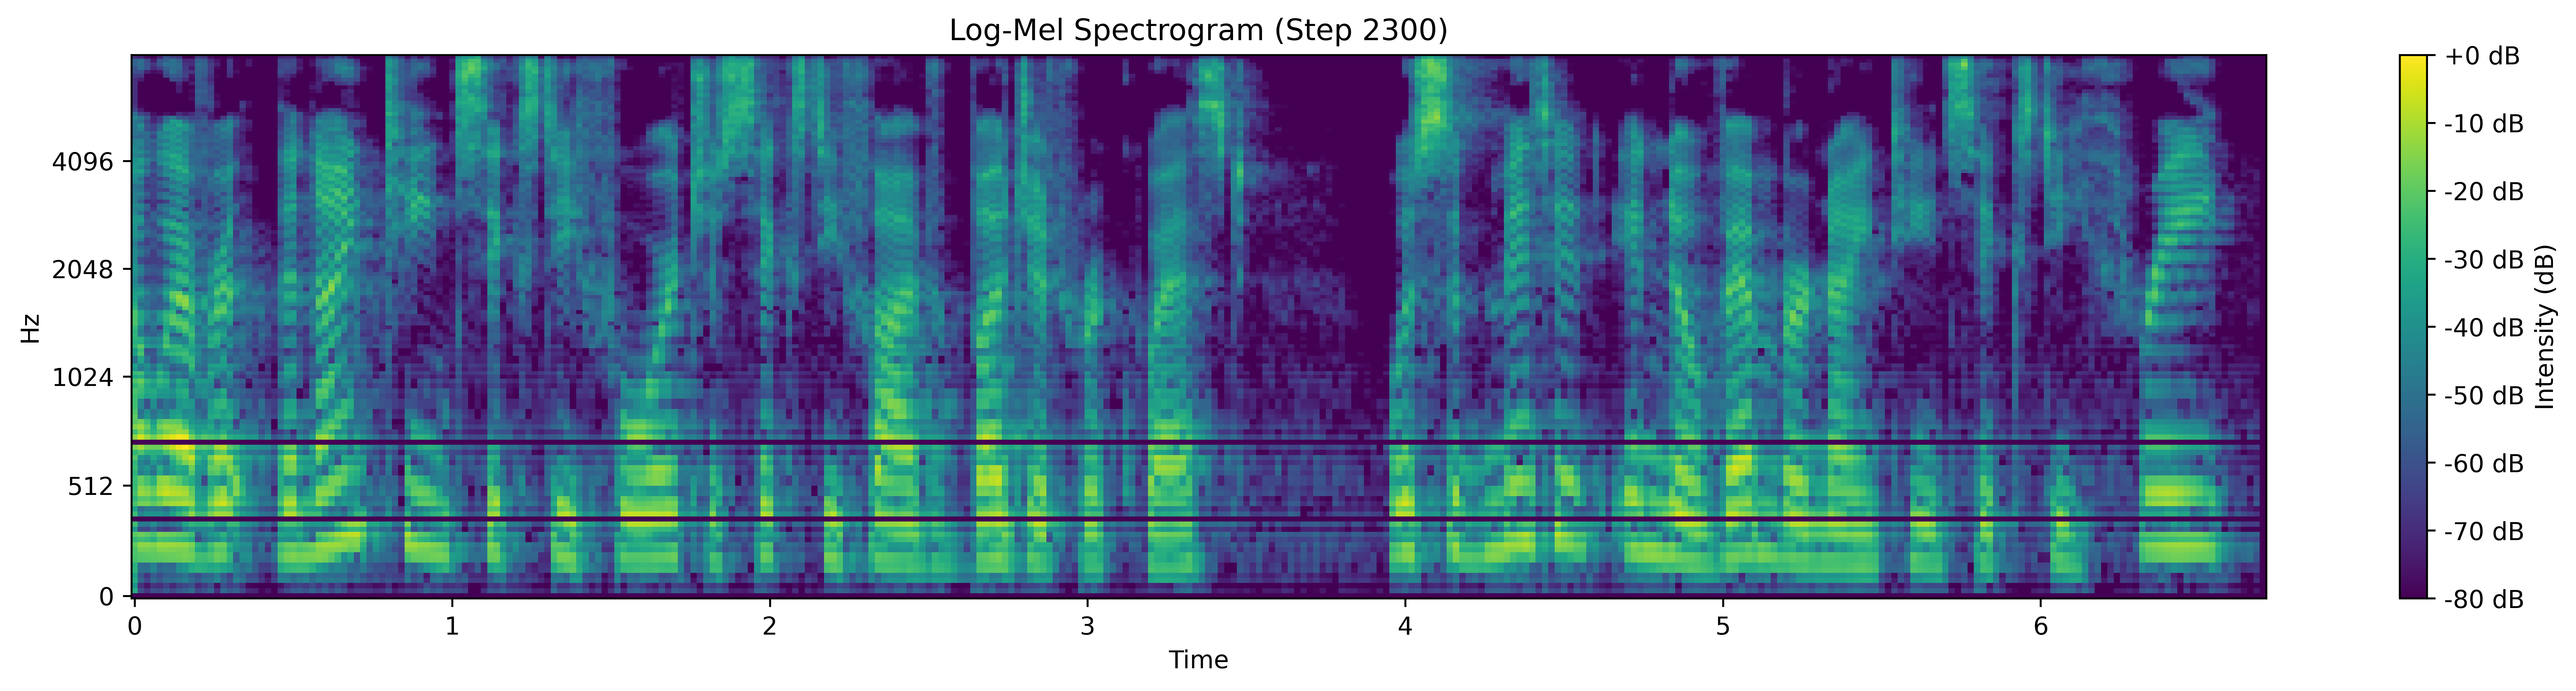

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# === Parameters ===
step = 2300
file_path = f"temp/{step}.wav"
start_trim_sec = 7.8

n_fft = 320
hop_length = n_fft // 1 # 75% overlap
n_mels = 128  # Number of Mel bands

# === Load waveform ===
y, sr = librosa.load(file_path, sr=None, mono=True)
y = y[int(start_trim_sec * sr):]
y = y / np.max(np.abs(y))  # Normalize

# === Compute mel spectrogram ===
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_db = librosa.power_to_db(S, ref=np.max)

# === Plot ===
plt.figure(dpi=600, figsize=(16, 4))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel', cmap=None)  # Green colormap
plt.colorbar(format='%+2.0f dB', label='Intensity (dB)')
plt.title(f'Log-Mel Spectrogram (Step {step})')
plt.tight_layout()
plt.show()


In [ ]:
m = torch.load("/raid/home/rajivratn/hemant_rajivratn/last/src/checkpoints/step_015000.pt")
m.keys()

dict_keys(['step', 'num_steps', 'models', 'optimizers', 'schedulers', 'config'])

In [16]:
m['models']['upsample']

OrderedDict([('norm.weight',
              tensor([0.9511, 0.8785, 0.8384,  ..., 0.8932, 1.0119, 0.9546], device='cuda:0')),
             ('norm.bias',
              tensor([ 0.0353,  0.1534, -0.0195,  ...,  0.0012,  0.0139,  0.0264],
                     device='cuda:0')),
             ('conv.weight',
              tensor([[[ 0.1316, -0.0563,  0.1010,  ..., -0.1523,  0.1191, -0.0971]],
              
                      [[-0.1993,  0.1037, -0.1527,  ...,  0.1161,  0.0672, -0.0367]],
              
                      [[ 0.1277,  0.0159,  0.0100,  ..., -0.0317, -0.1137,  0.0620]],
              
                      ...,
              
                      [[ 0.0491,  0.1131, -0.0479,  ...,  0.1010,  0.0367,  0.0473]],
              
                      [[ 0.0311, -0.1358,  0.0481,  ...,  0.0751, -0.1422,  0.0121]],
              
                      [[ 0.1026, -0.0075,  0.0217,  ...,  0.1036,  0.0259,  0.0643]]],
                     device='cuda:0')),
             ('conv.bi

In [13]:
m['models']['upsample']

OrderedDict([('norm.weight',
              tensor([0.9933, 0.9541, 0.9675,  ..., 0.9649, 1.0219, 1.0017], device='cuda:0')),
             ('norm.bias',
              tensor([ 0.0079,  0.0371,  0.0009,  ...,  0.0049, -0.0055, -0.0007],
                     device='cuda:0')),
             ('conv.weight',
              tensor([[[ 0.1126, -0.0893,  0.0768,  ..., -0.0895,  0.1309, -0.0880]],
              
                      [[-0.1055,  0.1326, -0.1352,  ...,  0.0861,  0.0358, -0.0963]],
              
                      [[ 0.0893, -0.0105, -0.0257,  ..., -0.0107, -0.1278,  0.0298]],
              
                      ...,
              
                      [[ 0.0558,  0.1184, -0.0338,  ...,  0.1111,  0.0370, -0.0189]],
              
                      [[ 0.0151, -0.1089,  0.0312,  ...,  0.0580, -0.0742,  0.0507]],
              
                      [[ 0.0759,  0.0345,  0.0278,  ...,  0.0857,  0.0146,  0.0967]]],
                     device='cuda:0')),
             ('conv.bi

In [14]:
import soundfile as sf
waveform, sample_rate = sf.read("/raid/home/rajivratn/hemant_rajivratn/last/src/temp/44200.wav")

path = "/raid/home/rajivratn/hemant_rajivratn/ljspeech/LJSpeech-1.1/wavs/LJ003-0064.wav"
w,s = sf.read(path)
t1, t2 = w.shape[-1], w.shape[-1] + 16000 
y1 = waveform[:t1]
y2 = waveform[t2:]
print(y1.min(), y1.max(), y2.min(), y2.max())  # should be in [-1.0, 1.0]

-0.2015380859375 0.20965576171875 -0.44732666015625 0.589111328125


In [15]:
y1.shape, y2.shape, 

((92994,), (92978,))

In [16]:
# normlaize y1 and y2
y1 = y1 / max(abs(y1))
y2 = y2 / max(abs(y2))
print(y1.min(), y1.max(), y2.min(), y2.max())  # should be in [-1.0, 1.0]

-0.9612809315866084 1.0 -0.7593244923331952 1.0


In [17]:
# play the audio
import IPython.display as ipd
ipd.Audio(y1, rate
          =sample_rate)

In [18]:
# play the audio
import IPython.display as ipd
ipd.Audio(y2, rate=sample_rate)

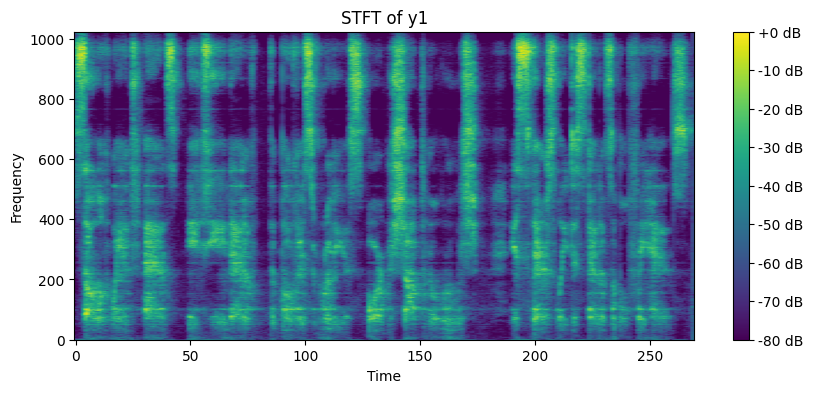

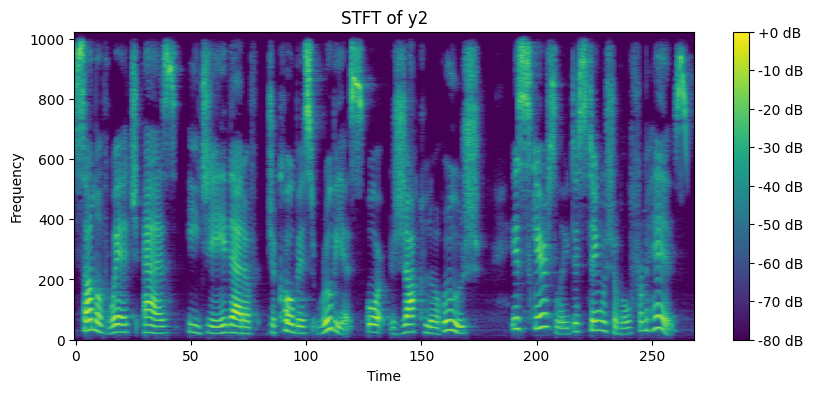

In [7]:
# get the stft 
import librosa

def get_stft(y, sr):
    stft = librosa.stft(y, n_fft=2048, hop_length=512)
    return stft
    # # mel spectrogram
    # mel = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    # return mel

# plot the stft for y1 and y2
import matplotlib.pyplot as plt
import numpy as np
def plot_stft(stft, title):
    plt.figure(figsize=(10, 4))
    plt.title(title)
    plt.imshow(librosa.amplitude_to_db(abs(stft), ref=np.max), aspect='auto', origin='lower')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()
    
stft1 = get_stft(y1, sample_rate)
stft2 = get_stft(y2, sample_rate)
plot_stft(stft1, "STFT of y1")
plot_stft(stft2, "STFT of y2")

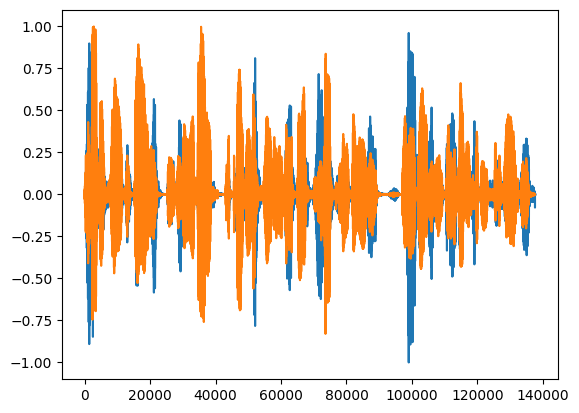

In [8]:
plt.plot(y1)
plt.plot(y2)